In [54]:
#%load_ext autoreload
#%autoreload 2
%reload_ext autoreload
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import jupyter
import pymssql
import plotly 
plotly.tools.set_credentials_file(username='perryraskin', api_key='2Qc3hhnv8Z4aEiUdajJ2')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import preprocessing
%matplotlib inline
pd.options.mode.chained_assignment = None
import glglive

In [55]:
glglive.say_hi()

hello


In [56]:
glg_data = glglive.pandas_the_data('./sql/Scheduling_Data_PSS.sql')

In [57]:
glg_data

,Week,PSS_Member_Name,PSS_Member_Email,Total_Requests_Recieved,Total_Scheduled_Calls,Unique_Calls_Scheduled,Initial_Schedule_Avg_turnaround_In_Hours,Second_Schedule_Avg_Turmaround_In_Hours,Third_Schedule_Avg_Turmaround_In_Hours
0,2017-04-16,Mary Albright,MAlbright@glgroup.com,0,91,80,0,0,0
1,2017-04-09,Emily Colwell,ECOLWELL@glgroup.com,0,65,59,0,0,0
2,2017-06-18,Demi Young,DYOUNG@glgroup.com,19,85,72,99,21,0
3,2017-05-21,Demi Young,DYOUNG@glgroup.com,13,90,73,88,1,0
4,2017-06-11,Mary Albright,MAlbright@glgroup.com,36,71,67,53,49,3
5,2017-06-04,Lauren Jacobs,ljacobs@glgroup.com,14,52,44,56,166,4
6,2017-07-16,Brianna Barcena,BBarcena@glgroup.com,42,151,119,33,19,0
7,2017-05-28,Patrick Rosen,PRosen@glgroup.com,57,71,58,50,77,0
8,2017-06-25,Shane Summers,SSummers@glgroup.com,2,162,140,8,0,0
9,2017-07-02,Tahjai Conkerite,TConkerite@glgroup.com,4,56,52,215,22,0


In [11]:
df = pd.DataFrame(glg_data)
#df.rename(columns={0: 'Name', 1: 'Continent', 2: 'Population', 3: 'LifeExpectancy', 4:'GNP'}, inplace=True);
#df = df.sort(['Total_Requests_Received'], ascending=[1]);

In [12]:
df.head()

,Week,PSS_Member_Name,PSS_Member_Email,Total_Requests_Recieved,Total_Scheduled_Calls,Unique_Calls_Scheduled,Initial_Schedule_Avg_turnaround_In_Hours,Second_Schedule_Avg_Turmaround_In_Hours,Third_Schedule_Avg_Turmaround_In_Hours
0,2017-04-16,Mary Albright,MAlbright@glgroup.com,0,91,80,0,0,0
1,2017-04-09,Emily Colwell,ECOLWELL@glgroup.com,0,65,59,0,0,0
2,2017-06-18,Demi Young,DYOUNG@glgroup.com,19,85,72,99,21,0
3,2017-05-21,Demi Young,DYOUNG@glgroup.com,13,90,73,88,1,0
4,2017-06-11,Mary Albright,MAlbright@glgroup.com,36,71,67,53,49,3


In [13]:
trace1 = Bar(
     x=df['Total_Scheduled_Calls'],
     y=df['Unique_Calls_Scheduled']
)
layout = Layout(
     title='Some GLG Data',
     xaxis=XAxis( title='Total Scheduled Calls' ),
     yaxis=YAxis( type='log', title='Unique Calls Scheduled' )
)
data = Data([trace1])
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='glg_data_1')

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
     x=df['Total_Scheduled_Calls'],
     name = 'Total Calls',
     connectgaps=True
)
trace2 = go.Scatter(
     x=df['Unique_Calls_Scheduled'],
     name = 'Unique Calls',
     connectgaps=True
)
layout = Layout(
     title='More GLG Data',
     xaxis=XAxis( title='Total Scheduled Calls' )
)
data = [trace1, trace2]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='glg_connected_lines')

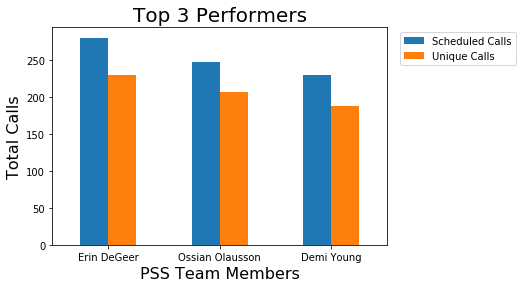

In [64]:
#-- TOP 3 PERFORMERS --#

# sort df by descending Total Scheduled Calls
dfs = df.sort_values(['Total_Scheduled_Calls'], ascending=False)

# drop duplicate members after appearing once and reset index
dfd = dfs.drop_duplicates('PSS_Member_Name').reset_index()

# values from table
groups = [[dfd['Total_Scheduled_Calls'][0],dfd['Unique_Calls_Scheduled'][0]],
       [dfd['Total_Scheduled_Calls'][1],dfd['Unique_Calls_Scheduled'][1]],
       [dfd['Total_Scheduled_Calls'][2],dfd['Unique_Calls_Scheduled'][2]]]
group_labels = [dfd['PSS_Member_Name'][0], dfd['PSS_Member_Name'][1], dfd['PSS_Member_Name'][2]]
group_metrics = ["Scheduled Calls", "Unique Calls"]

data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar(rot=0).legend(bbox_to_anchor=(1.4, 1))
plt.title('Top 3 Performers', fontsize= 20)
plt.xlabel('PSS Team Members', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

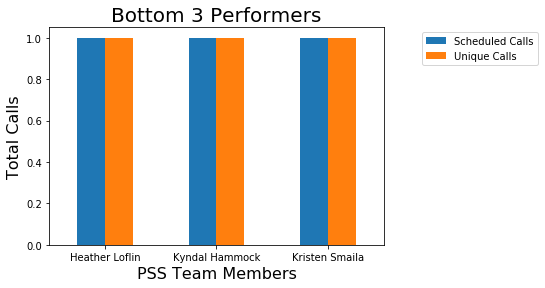

In [63]:
#-- BOTTOM 3 PERFORMERS --#

# sort df by ascending Total Scheduled Calls
dfsb = df.sort_values(['Total_Scheduled_Calls'], ascending=True)

# drop duplicate members after appearing once and reset index
dfdb = dfsb.drop_duplicates('PSS_Member_Name').reset_index()

# values from table
groups = [[dfdb['Total_Scheduled_Calls'][0],dfdb['Unique_Calls_Scheduled'][0]],
       [dfdb['Total_Scheduled_Calls'][1],dfdb['Unique_Calls_Scheduled'][1]],
       [dfdb['Total_Scheduled_Calls'][2],dfdb['Unique_Calls_Scheduled'][2]]]
group_labels = [dfdb['PSS_Member_Name'][0], dfdb['PSS_Member_Name'][1], dfdb['PSS_Member_Name'][2]]
group_metrics = ["Scheduled Calls", "Unique Calls"]

data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar(rot=0).legend(bbox_to_anchor=(1.1, 1))
plt.title('Bottom 3 Performers', fontsize= 20)
plt.xlabel('PSS Team Members', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

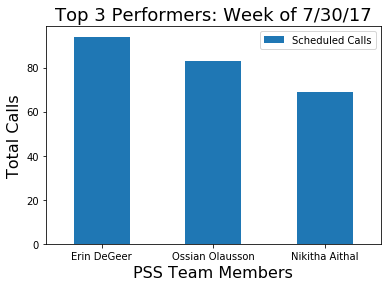

In [60]:
#-- TOP 3 PERFORMERS OF THE WEEK --#

# sort df by descending Total Scheduled Calls
dfsw = df.sort_values(['Total_Scheduled_Calls'], ascending=False)

# only show data from this week
dftw = dfsw.loc[dfsw['Week'] == '2017-07-30']

# drop duplicate members after appearing once and reset index
dfdw = dftw.drop_duplicates('PSS_Member_Name').reset_index()

# values from table
groups = [[dfdw['Total_Scheduled_Calls'][0]],
       [dfdw['Total_Scheduled_Calls'][1]],
       [dfdw['Total_Scheduled_Calls'][2]]]

group_labels = [dfdw['PSS_Member_Name'][0], dfdw['PSS_Member_Name'][1], dfdw['PSS_Member_Name'][2]]
group_metrics = ["Scheduled Calls"]

data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar(rot=0).legend(bbox_to_anchor=(1, 1))
plt.title('Top 3 Performers: Week of 7/30/17', fontsize= 18)
plt.xlabel('PSS Team Members', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

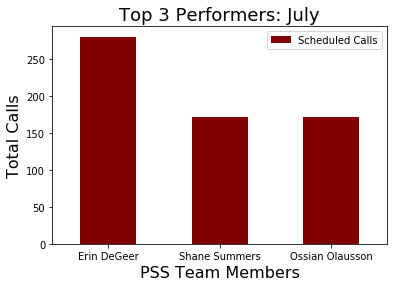

In [62]:
#-- TOP 3 PERFORMERS OF THE MONTH --#

# sort df by descending Total Scheduled Calls
dfsw = df.sort_values(['Total_Scheduled_Calls'], ascending=False)

# only show data from this month
dfsw['Week'] = pd.to_datetime(dfsw['Week'])
mask = (dfsw['Week'] >= '2017-07-01') & (dfsw['Week'] <= '2017-07-31')
dftw = dfsw.loc[mask]

# drop duplicate members after appearing once and reset index
dfdw = dftw.drop_duplicates('PSS_Member_Name').reset_index()

# values from table
groups = [[dfdw['Total_Scheduled_Calls'][0]],
       [dfdw['Total_Scheduled_Calls'][1]],
       [dfdw['Total_Scheduled_Calls'][2]]]

group_labels = [dfdw['PSS_Member_Name'][0], dfdw['PSS_Member_Name'][1], dfdw['PSS_Member_Name'][2]]
group_metrics = ["Scheduled Calls"]

data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar(rot=0, color='maroon').legend(bbox_to_anchor=(1, 1))
plt.title('Top 3 Performers: July', fontsize= 18)
plt.xlabel('PSS Team Members', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

In [32]:
# sort df by descending Total Scheduled Calls
dfsw = df.sort_values(['Total_Scheduled_Calls'], ascending=False)

# only show data from this month
dfsw['Week'] = pd.to_datetime(dfsw['Week'])
mask = (dfsw['Week'] >= '2017-07-02') & (dfsw['Week'] <= '2017-07-30')
dftw = dfsw.loc[mask]

# drop duplicate members after appearing once and reset index
dfdw = dftw.drop_duplicates('PSS_Member_Name').reset_index()
dfdw

,index,Week,PSS_Member_Name,PSS_Member_Email,Total_Requests_Recieved,Total_Scheduled_Calls,Unique_Calls_Scheduled,Initial_Schedule_Avg_turnaround_In_Hours,Second_Schedule_Avg_Turmaround_In_Hours,Third_Schedule_Avg_Turmaround_In_Hours
0,177,2017-07-16,Erin DeGeer,EDeGeer@glgroup.com,30,280,230,37,66,5
1,11,2017-07-16,Shane Summers,SSummers@glgroup.com,0,172,143,0,0,0
2,115,2017-07-09,Ossian Olausson,oolausson@glgroup.com,7,171,147,32,48,0
3,159,2017-07-23,Nikitha Aithal,NAITHAL@glgroup.com,0,153,128,0,0,0
4,301,2017-07-16,Alex Jordan,AJordan@glgroup.com,73,151,121,36,80,75
5,6,2017-07-16,Brianna Barcena,BBarcena@glgroup.com,42,151,119,33,19,0
6,471,2017-07-09,Tahjai Conkerite,TConkerite@glgroup.com,14,141,121,8,2,0
7,10,2017-07-23,Lauren Jacobs,ljacobs@glgroup.com,20,139,123,28,0,0
8,127,2017-07-23,Austin Rittenberry,ARittenberry@glgroup.com,8,139,113,45,23,0
9,402,2017-07-16,Samantha Byrd,SByrd@glgroup.com,3,138,117,97,0,0


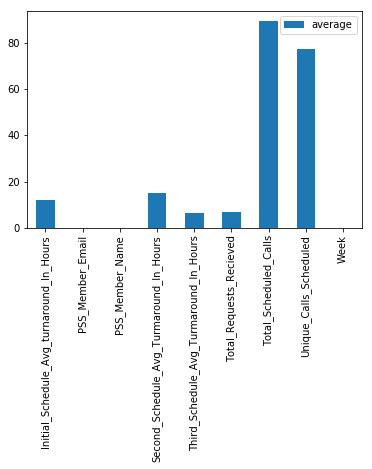

In [20]:
pd.concat(
    [df.mean().rename('average'), df.min().rename('min'), df.max().rename('max')],
    axis=1
).plot.bar()